In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(14,8)}, font_scale=.9)

In [ ]:
df = pd.read_csv('Cleaned-Data.csv')
display(df)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [ ]:
indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']
target_columns = ['Severity_None']
indicators2 = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender', 'Severity_None']
features = df[indicators]
targets = df[target_columns]
display(features.head(), targets.head())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0


,Severity_None
0,0
1,0
2,0
3,0
4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


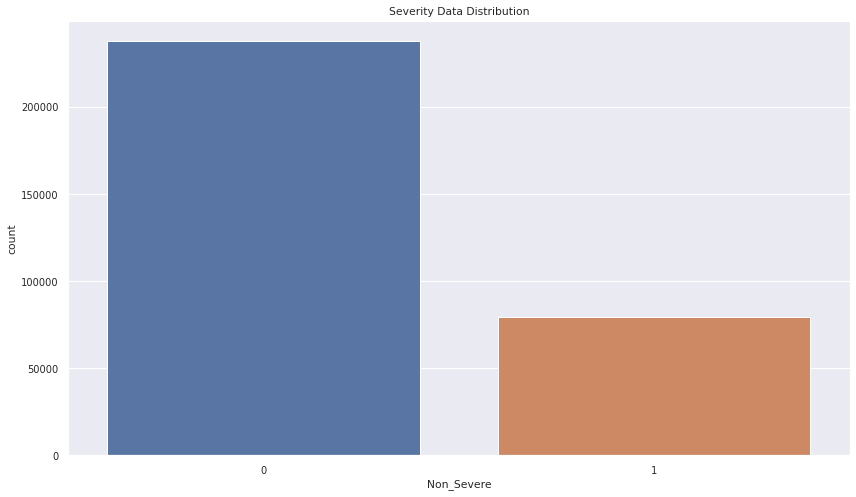

In [ ]:
targets = targets.rename(columns={'Severity_None':'Non_Severe'})
sns.countplot(targets['Non_Severe'])
plt.title("Severity Data Distribution")
plt.show()


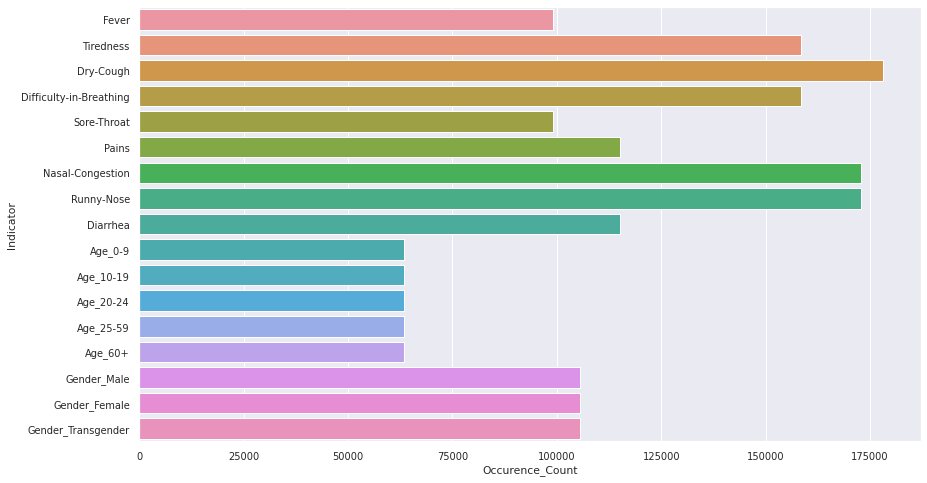

In [ ]:
temp = []
for i in indicators:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Indicator":indicators, "Occurence_Count":temp})
sns.barplot(data = temp_df, y="Indicator", x="Occurence_Count")

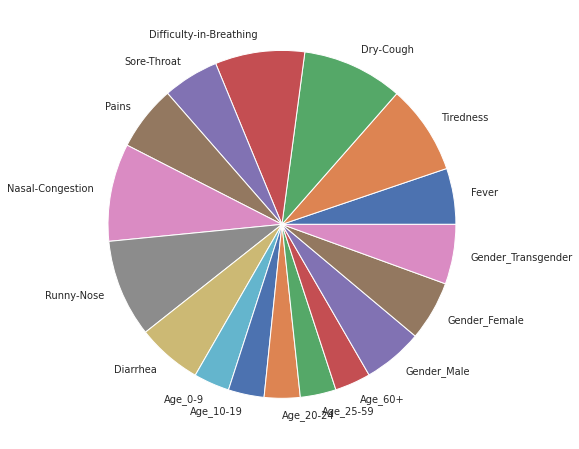

In [ ]:
plt.pie(data=temp_df, x="Occurence_Count", labels=temp_df["Indicator"])
plt.show()


In [ ]:
def get_symptom_count(the_list):
    return sum(the_list.values)
features['Total_Symptom'] = features[indicators].apply(get_symptom_count, axis=1)
feats = df[indicators2]
feats['Total_Symptom'] = feats[indicators].apply(get_symptom_count, axis=1)
print(feats['Total_Symptom'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         11
1         11
2         11
3         11
4         11
          ..
316795     2
316796     2
316797     2
316798     2
316799     2
Name: Total_Symptom, Length: 316800, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


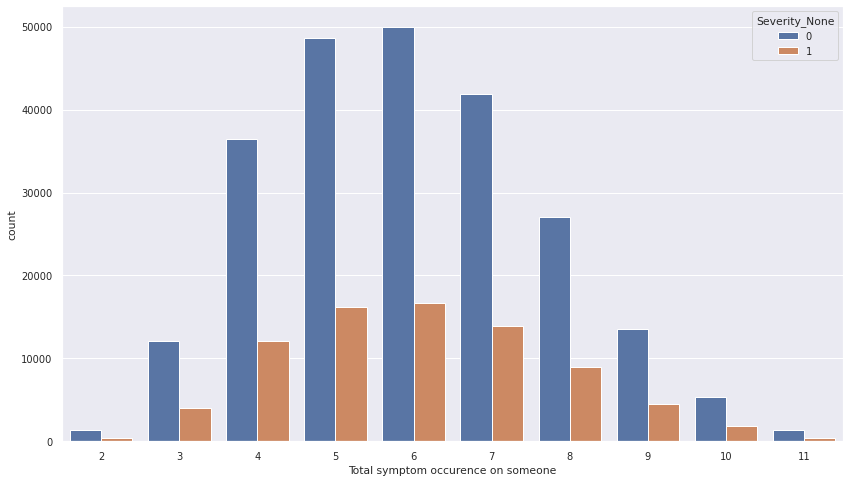

In [ ]:
sns.countplot(data=feats, x='Total_Symptom', hue='Severity_None')
plt.xlabel("Total symptom occurence on someone")
plt.show()

In [ ]:
data = features
data['Non_Severe'] = targets['Non_Severe'].values
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender,Total_Symptom,Non_Severe
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
316796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0
316797,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1
316798,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1


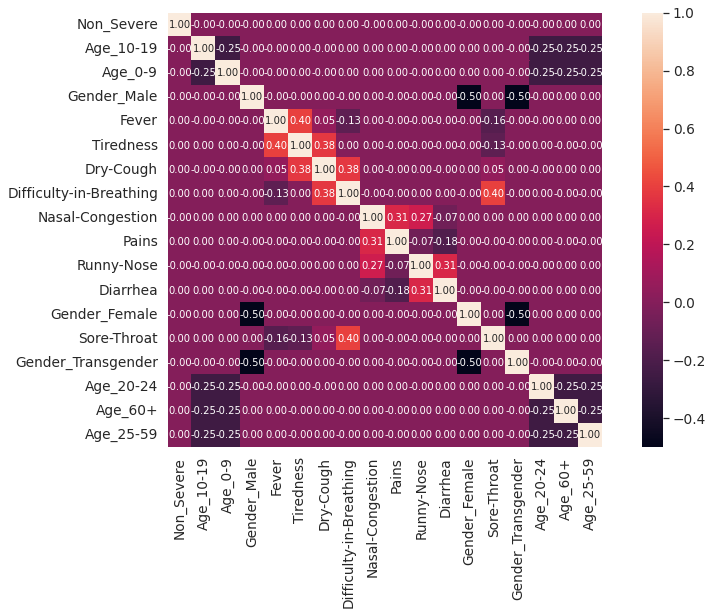

In [ ]:
data_for_corr = data.drop(labels="Total_Symptom", axis=1)
# data_for_corr['Condition'] = data_for_corr['Condition'].apply(make_condition_grade)
corrmat = data_for_corr.corr()
k = 22
cols = corrmat.nlargest(k, 'Non_Severe')['Non_Severe'].index
cm = np.corrcoef(data_for_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:


from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)



In [ ]:


x = data.drop(['Non_Severe', 'Total_Symptom'], axis=1)
x = PCA(n_components = 3).fit_transform(x) # no change with 5
y = data['Non_Severe']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.25)
x


array([[ 1.03639694e+00,  2.82500600e-03,  9.29277678e-01],
       [ 1.03639694e+00,  2.82500600e-03,  9.29277678e-01],
       [ 1.03639694e+00,  2.82500600e-03,  9.29277678e-01],
       ...,
       [-9.83917659e-01, -8.44611775e-05, -9.05904047e-01],
       [-9.83917659e-01, -8.44611775e-05, -9.05904047e-01],
       [-9.83917659e-01, -8.44611775e-05, -9.05904047e-01]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


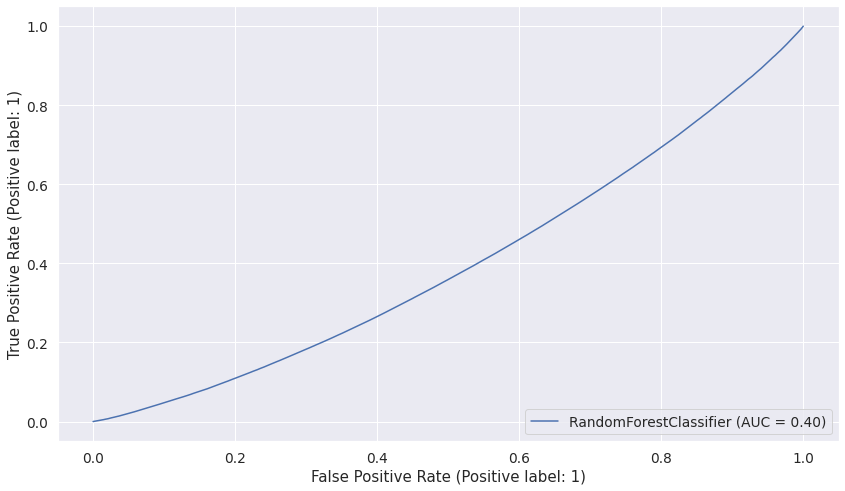

0.7506060606060606

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc,x_test,y_test)
plt.show()
rfc.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


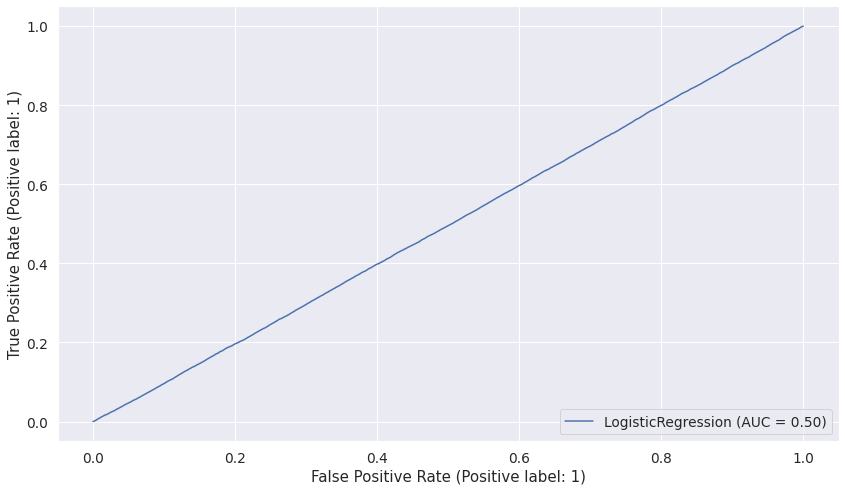

0.7506060606060606

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,x_test,y_test)
plt.show()
lr.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


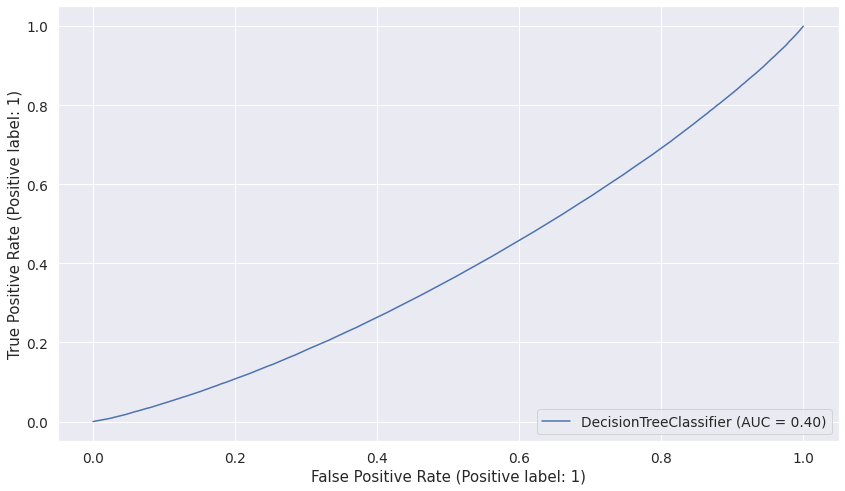

0.7506060606060606

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(DTC,x_test,y_test)
plt.show()
DTC.score(x_test, y_test)

In [ ]:
"""params = {
    "max_depth":[15,20,25], 
    "n_estimators":[27,30,33],
    "criterion":["gini", "entropy"],
}

rfc = RandomForestClassifier()

rf_reg = GridSearchCV(rfc, params, cv = 10, n_jobs =10)
rf_reg.fit(x_train, y_train)
print(rf_reg.best_estimator_)"""

'params = {\n    "max_depth":[15,20,25], \n    "n_estimators":[27,30,33],\n    "criterion":["gini", "entropy"],\n}\n\nrfc = RandomForestClassifier()\n\nrf_reg = GridSearchCV(rfc, params, cv = 10, n_jobs =10)\nrf_reg.fit(x_train, y_train)\nprint(rf_reg.best_estimator_)'

In [ ]:
rfc_tune = RandomForestClassifier(max_depth=15, n_estimators=27)
rfc_tune.fit(x_train, y_train)
score = cross_val_score(rfc,x_test,y_test,cv = k_fold,n_jobs=1,scoring="accuracy")
print(score.mean())

0.7501262626262627


In [ ]:
lr_tune = LogisticRegression(penalty='l1', solver='liblinear')
lr_tune.fit(x_train, y_train)
score = cross_val_score(lr_tune, x_test, y_test, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score.mean())

0.7506060606060606


In [ ]:
params = {
    "criterion":["gini", "entropy"],
    "max_depth":[15,20,25], 
}
dtc = DecisionTreeClassifier()
dtc_reg = GridSearchCV(dtc, params, cv=10, n_jobs=10)
dtc_reg.fit(x_train, y_train)
print(dtc_reg.best_estimator_)

DecisionTreeClassifier(max_depth=15)


In [ ]:


dtc_tune = DecisionTreeClassifier(max_depth=15)
dtc_tune.fit(x_train, y_train)
score = cross_val_score(dtc_tune, x_test, y_test, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score.mean())



0.7505176767676768


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
score = cross_val_score(classifier, x_test, y_test, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score.mean())


0.7506060606060606
